In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [49]:
def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

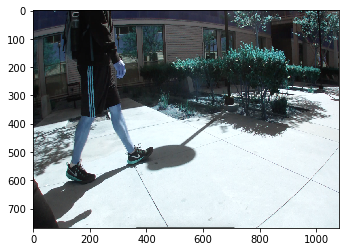

In [40]:
foot = cv2.imread('danny_foot.png')


resized_foot = cv2.resize(foot, (1080, 768))
plt.imshow(resized_foot)
plt.show()

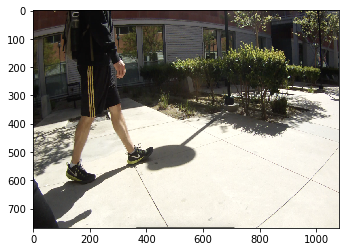

In [4]:
# convert to rgb from bgr
foot_rgb = cv2.cvtColor(resized_foot, cv2.COLOR_BGR2RGB)
plt.imshow(foot_rgb)
plt.show()

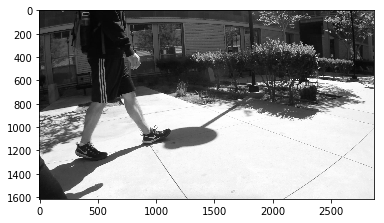

135.65370122813675

In [57]:
foot_grayscaled = cv2.cvtColor(foot, cv2.COLOR_BGR2GRAY)
plt.imshow(foot_grayscaled, cmap='gray')
plt.show()
foot_grayscaled.mean()

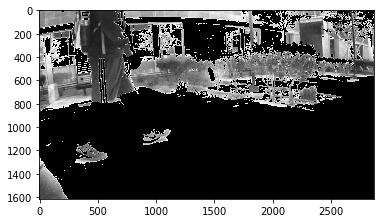

In [69]:
lower_black = np.array([0])
upper_black = np.array([64])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

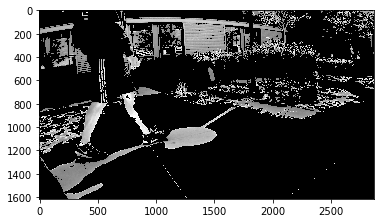

In [78]:
lower_black = np.array([65])
upper_black = np.array([129])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

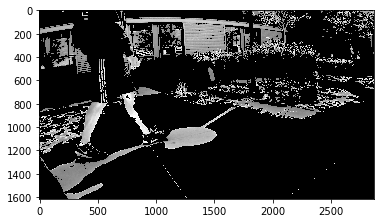

In [87]:
ret1, img1_thresh = cv2.threshold(pimg1, lower_black, upp, cv2.THRESH_TOZERO )
plt.imshow(img1_thresh, cmap='gray')
plt.show()

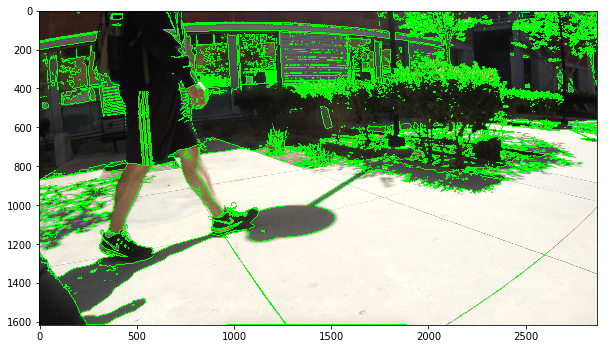

In [93]:
threshold_color = [0, 255, 0] # green
foot_copy = foot.copy()
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img1_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(foot_copy, img1_contours, -1, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(foot_copy, cv2.COLOR_BGR2RGB) )
plt.show()

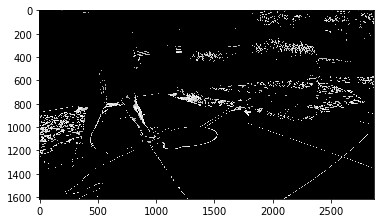

In [71]:
lower_black = np.array([130])
upper_black = np.array([194])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

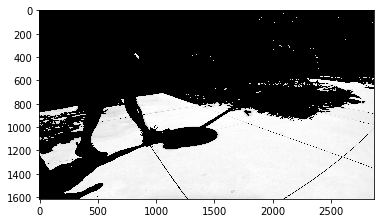

In [72]:
lower_black = np.array([195])
upper_black = np.array([255])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

roi


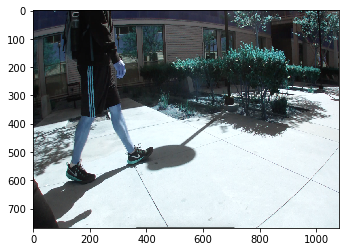

In [30]:
# Load two images
# img1 = cv2.imread('.jpg')
# img2 = cv2.imread('opencv-logo.png')
# I want to put logo on top-left corner, So I create a ROI
img1 = resized_foot
img2 = foot_rgb
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print("roi")
plt.imshow(roi)
plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()

img2gray


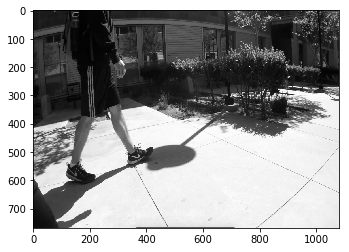

In [31]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print("img2gray")
plt.imshow(img2gray, cmap='gray')
plt.show()



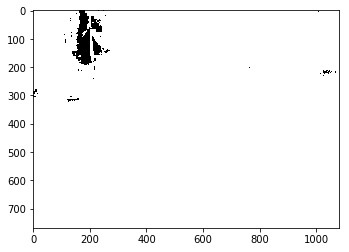

In [32]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.show()



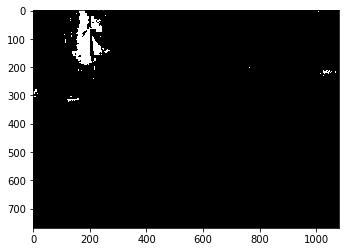

In [33]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')
plt.show()



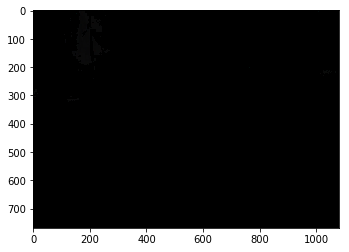

In [34]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg)
plt.show()



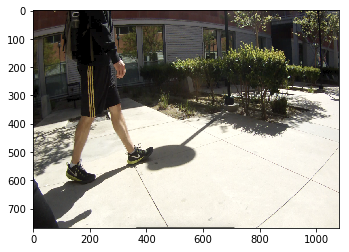

In [35]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(img2_fg)
plt.show()



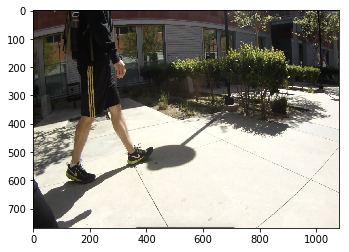

In [36]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
# cv2.imshow('res',img1)
plt.imshow(img1)
plt.show()